# Proyecto 

### Introducción



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## Task 0: Data Ingestion and Preprocessing

In [34]:

users_df = pd.read_csv('data/users.csv', encoding='latin-1')

reviews_df = pd.read_csv('data/reviews.csv', header=None)

flowers_df = pd.read_csv('data/flowers.csv', header=None, names=['id', 'link1', 'price', 'description', 'dimensions', 'link2',
                                                              'link3','service', 'category', 'name'])

sales_df = pd.read_csv('data/sales.csv')

## Task 1: Exploratory Data Analysis (EDA)

### ¿Cúal es la distribución de edades de los usuarios?

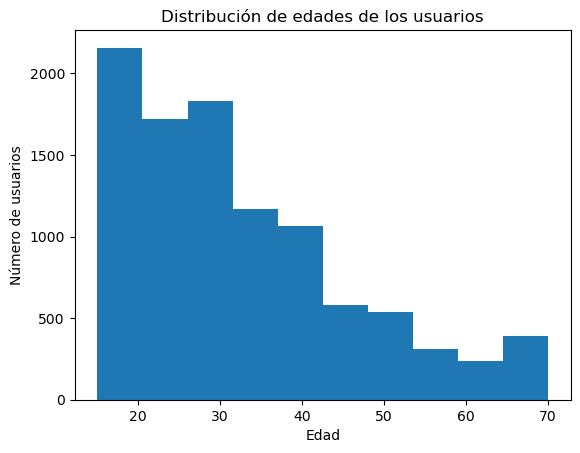

In [4]:
plt.hist(users_df["age"])
plt.xlabel("Edad")
plt.ylabel("Número de usuarios")
plt.title("Distribución de edades de los usuarios")
plt.show()

In [5]:
users_df["age"].describe()

count    10000.000000
mean        32.180300
std         13.849411
min         15.000000
25%         21.000000
50%         29.000000
75%         40.000000
max         70.000000
Name: age, dtype: float64

### ¿Cúal es la distribución de género?

In [20]:
gender_counts = users_df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.pie(gender_counts, names='gender', values='count', title='Distribución Genero')

fig.show()


### ¿Cual es el estado civil de los usuarios?

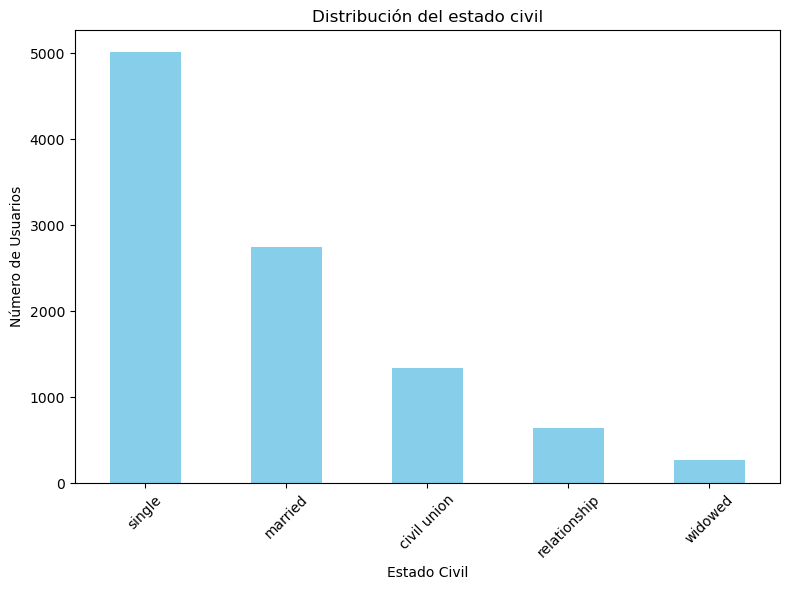

In [38]:

plt.figure(figsize=(8, 6))
users_df['marital_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución del estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### ¿Cuantos usuarios se registran en la plataforma por mes?

Text(0, 0.5, 'Número de usuarios')

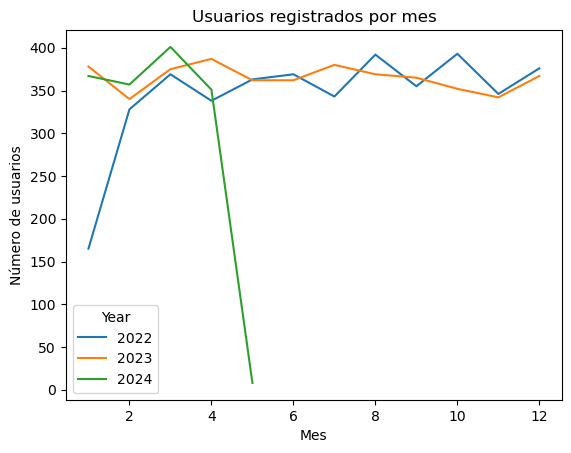

In [33]:
users_df['date_joined'] = pd.to_datetime(users_df['date_joined'], origin='1899-12-30', unit='D')

users_df['Year'] = users_df['date_joined'].dt.year
users_df['Month'] = users_df['date_joined'].dt.month

ventas_por_mes = users_df.groupby(['Year', 'Month']).size()

ventas_por_mes.unstack(0).plot()

plt.title('Usuarios registrados por mes')
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')